In [0]:
# Import the required libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

from google.colab import files

In [2]:
files.upload()
train_data_orig = pd.read_csv('train (3).csv')
test_data_orig = pd.read_csv('test (3).csv')

Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [3]:
print("Shape of Training Data")
print(train_data_orig.shape)
print("\n")

print("Shape of Testing Data")
print(test_data_orig.shape)

Shape of Training Data
(371, 7)


Shape of Testing Data
(529, 6)


In [4]:
print("Columns in Training Data")
print(train_data_orig.columns)
print("\n")

print("Columns in Testing Data")
print(test_data_orig.columns)

Columns in Training Data
Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color', 'type'],
      dtype='object')


Columns in Testing Data
Index(['id', 'bone_length', 'rotting_flesh', 'hair_length', 'has_soul',
       'color'],
      dtype='object')


In [5]:
train_data_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
id               371 non-null int64
bone_length      371 non-null float64
rotting_flesh    371 non-null float64
hair_length      371 non-null float64
has_soul         371 non-null float64
color            371 non-null object
type             371 non-null object
dtypes: float64(4), int64(1), object(2)
memory usage: 20.4+ KB


In [6]:
train_data_orig.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [0]:
train_data = train_data_orig.drop(['id'], axis = 1)
test_data = test_data_orig.drop(['id'], axis = 1)

In [8]:
train_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000
mean,0.434160,0.506848,0.529114,0.471392
std,0.132833,0.146358,0.169902,0.176129
min,0.061032,0.095687,0.134600,0.009402
25%,0.340006,0.414812,0.407428,0.348002
50%,0.434891,0.501552,0.538642,0.466372
75%,0.517223,0.603977,0.647244,0.600610
max,0.817001,0.932466,1.000000,0.935721


In [9]:
test_data.describe()

,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000
mean,0.425474,0.503637,0.517288,0.464096
std,0.136079,0.158552,0.171727,0.179659
min,0.000000,0.000000,0.000000,0.000000
25%,0.329383,0.393987,0.388189,0.338964
50%,0.421989,0.510065,0.520220,0.461294
75%,0.519024,0.605957,0.644824,0.584448
max,1.000000,1.000000,0.999841,1.000000


In [10]:
print(np.sort(train_data['color'].unique()))
print(np.sort(test_data['color'].unique()))

['black' 'blood' 'blue' 'clear' 'green' 'white']
['black' 'blood' 'blue' 'clear' 'green' 'white']


In [11]:
print(np.sort(train_data['type'].unique()))

['Ghost' 'Ghoul' 'Goblin']


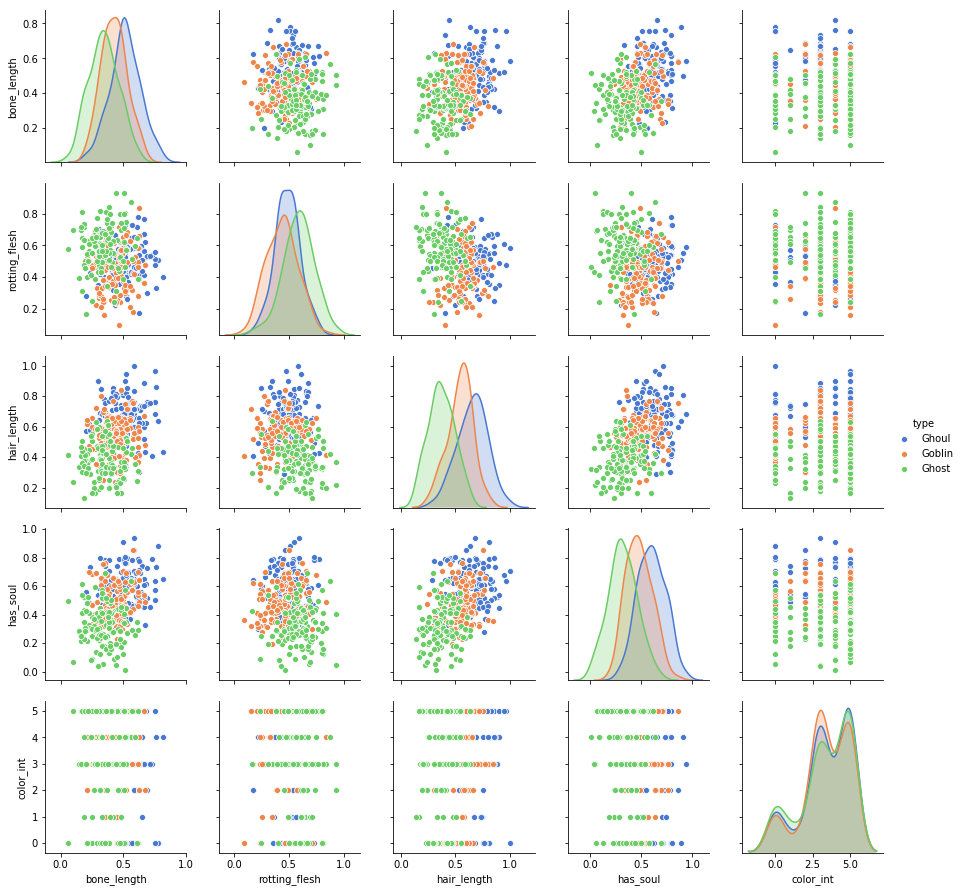

In [12]:
# Use LabelEncoder for the 'color' feature
color_le = preprocessing.LabelEncoder()
color_le.fit(train_data['color'])
train_data['color_int'] = color_le.transform(train_data['color'])

_ = sns.pairplot(train_data.drop('color', axis = 1), hue = 'type', palette = 'muted', diag_kind='kde')

train_data.drop('color_int', axis = 1, inplace = True)

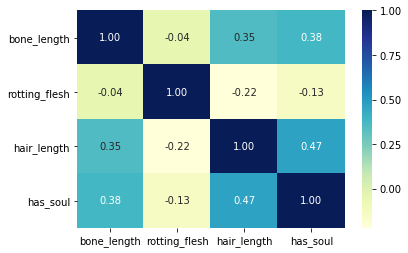

In [13]:
_ = sns.heatmap(train_data.corr(), annot = True, fmt = ".2f", cmap = 'YlGnBu')

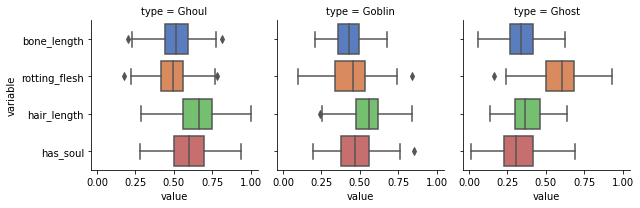

In [14]:
g = sns.FacetGrid(pd.melt(train_data, id_vars='type', value_vars = ['bone_length', 'rotting_flesh', 'hair_length', 'has_soul']), col = 'type')
g = g.map(sns.boxplot, 'value', 'variable', palette = 'muted')

In [15]:
df = pd.get_dummies(train_data.drop('type', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(df, train_data['type'], test_size = 0.25, random_state = 0)

dt_clf = DecisionTreeClassifier(random_state = 0)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)

print(metrics.classification_report(y_test, y_pred))
print("\nAccuracy Score is: " + str(metrics.accuracy_score(y_test, y_pred)))

              precision    recall  f1-score   support

       Ghost       0.77      0.61      0.68        33
       Ghoul       0.57      0.78      0.66        27
      Goblin       0.47      0.42      0.44        33

    accuracy                           0.59        93
   macro avg       0.60      0.60      0.59        93
weighted avg       0.60      0.59      0.59        93


Accuracy Score is: 0.5913978494623656


In [0]:
accuracy_scorer = metrics.make_scorer(metrics.accuracy_score)

In [0]:
X_train = pd.get_dummies(train_data.drop('type', axis = 1))
y_train = train_data['type']
X_test = pd.get_dummies(test_data)

In [18]:
params = {'n_estimators':[10, 20, 50, 100], 'criterion':['gini', 'entropy'], 'max_depth':[None, 5, 10, 25, 50]}
rf = RandomForestClassifier(random_state = 0)
clf = GridSearchCV(rf, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

rf_best = RandomForestClassifier(n_estimators = 10, random_state = 0)

Best score: 0.692722371967655
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'n_estimators': 20}


In [19]:
params = {'n_estimators':[10, 25, 50, 100], 'max_samples':[1, 3, 5, 10]}
bag = BaggingClassifier(random_state = 0)
clf = GridSearchCV(bag, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

bag_best = BaggingClassifier(max_samples = 5, n_estimators = 25, random_state = 0)

Best score: 0.7088948787061995
Best parameters: {'max_samples': 10, 'n_estimators': 50}


In [20]:
params = {'learning_rate':[0.05, 0.1, 0.5], 'n_estimators':[100, 200, 500], 'max_depth':[2, 3, 5, 10]}
gbc = GradientBoostingClassifier(random_state = 0)
clf = GridSearchCV(gbc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

gbc_best = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state = 0)

Best score: 0.7304582210242587
Best parameters: {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}


In [21]:
params = {'n_neighbors':[3, 5, 10, 20], 'leaf_size':[20, 30, 50], 'p':[1, 2, 5], 'weights':['uniform', 'distance']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

knc_best = KNeighborsClassifier(n_neighbors = 10)

Best score: 0.6684636118598383
Best parameters: {'leaf_size': 20, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [22]:
params = {'penalty':['l1', 'l2'], 'C':[1, 2, 3, 5, 10]}
lr = LogisticRegression(random_state = 0)
clf = GridSearchCV(lr, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

lr_best = LogisticRegression(penalty = 'l1', C = 1, random_state = 0)

Best score: 0.7304582210242587
Best parameters: {'C': 10, 'penalty': 'l1'}


In [23]:
params = {'kernel':['linear', 'rbf'], 'C':[1, 3, 5, 10], 'degree':[3, 5, 10]}
svc = SVC(probability = True, random_state = 0)
clf = GridSearchCV(svc, param_grid = params, scoring = accuracy_scorer, cv = 5, n_jobs = -1)
clf.fit(X_train, y_train)
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

svc_best = SVC(C = 10, degree = 3, kernel = 'linear', probability = True, random_state = 0)

Best score: 0.7250673854447439
Best parameters: {'C': 5, 'degree': 3, 'kernel': 'linear'}


In [24]:
voting_clf = VotingClassifier(estimators=[('rf', rf_best), ('bag', bag_best), ('gbc', gbc_best), ('lr', lr_best), ('svc', svc_best)]
                              , voting='hard')
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
print("\nAccuracy Score for VotingClassifier is: " + str(voting_clf.score(X_train, y_train)))


Accuracy Score for VotingClassifier is: 0.8975741239892183


In [0]:
submission = pd.DataFrame({'id':test_data_orig['id'], 'type':y_pred})
submission.to_csv('submission_ghosts.csv', index=False)

In [0]:
files.download('submission_ghosts.csv')